## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [7]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
from keras.layers import BatchNormalization, Activation
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i,n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            x = Activation("relu")(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = Activation("relu")(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [11]:
results = {}
"""
Write your training loop and record results
"""
for batch_size in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test),
              shuffle=True)
    
    # Collect results
    exp_name_tag = ("exp-%s" % (batch_size))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
__________

50000/50000 [==============================] - 168s 3ms/step - loss: 2.2716 - acc: 0.1341 - val_loss: 2.2681 - val_acc: 0.1255
Epoch 47/50
50000/50000 [==============================] - 168s 3ms/step - loss: 2.2695 - acc: 0.1423 - val_loss: 2.2840 - val_acc: 0.1238
Epoch 48/50
50000/50000 [==============================] - 168s 3ms/step - loss: 2.2696 - acc: 0.1418 - val_loss: 2.2694 - val_acc: 0.1202
Epoch 49/50
50000/50000 [==============================] - 168s 3ms/step - loss: 2.2670 - acc: 0.1366 - val_loss: 2.2740 - val_acc: 0.1200
Epoch 50/50
50000/50000 [==============================] - 168s 3ms/step - loss: 2.2636 - acc: 0.1370 - val_loss: 2.2858 - val_acc: 0.1150
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)             

50000/50000 [==============================] - 26s 516us/step - loss: 0.5572 - acc: 0.8058 - val_loss: 1.8541 - val_acc: 0.4958
Epoch 42/50
50000/50000 [==============================] - 26s 517us/step - loss: 0.5495 - acc: 0.8060 - val_loss: 1.8820 - val_acc: 0.5019
Epoch 43/50
50000/50000 [==============================] - 26s 517us/step - loss: 0.5409 - acc: 0.8088 - val_loss: 1.7908 - val_acc: 0.5223
Epoch 44/50
50000/50000 [==============================] - 26s 521us/step - loss: 0.5324 - acc: 0.8110 - val_loss: 1.8896 - val_acc: 0.5053
Epoch 45/50
50000/50000 [==============================] - 26s 517us/step - loss: 0.5226 - acc: 0.8165 - val_loss: 2.0681 - val_acc: 0.4741
Epoch 46/50
50000/50000 [==============================] - 26s 517us/step - loss: 0.5159 - acc: 0.8157 - val_loss: 1.8538 - val_acc: 0.5116
Epoch 47/50
50000/50000 [==============================] - 26s 517us/step - loss: 0.5041 - acc: 0.8220 - val_loss: 1.7700 - val_acc: 0.5307
Epoch 48/50
50000/50000 [=======

50000/50000 [==============================] - 17s 334us/step - loss: 0.3352 - acc: 0.8806 - val_loss: 2.1913 - val_acc: 0.4978
Epoch 37/50
50000/50000 [==============================] - 17s 335us/step - loss: 0.3213 - acc: 0.8877 - val_loss: 2.1357 - val_acc: 0.5065
Epoch 38/50
50000/50000 [==============================] - 17s 334us/step - loss: 0.3131 - acc: 0.8890 - val_loss: 2.1598 - val_acc: 0.4892
Epoch 39/50
50000/50000 [==============================] - 17s 337us/step - loss: 0.2951 - acc: 0.8959 - val_loss: 2.4549 - val_acc: 0.4866
Epoch 40/50
50000/50000 [==============================] - 17s 334us/step - loss: 0.2808 - acc: 0.9011 - val_loss: 2.2085 - val_acc: 0.4935
Epoch 41/50
50000/50000 [==============================] - 17s 334us/step - loss: 0.2848 - acc: 0.8990 - val_loss: 2.3051 - val_acc: 0.4974
Epoch 42/50
50000/50000 [==============================] - 17s 336us/step - loss: 0.2818 - acc: 0.8994 - val_loss: 2.5013 - val_acc: 0.4744
Epoch 43/50
50000/50000 [=======

50000/50000 [==============================] - 10s 206us/step - loss: 0.1520 - acc: 0.9558 - val_loss: 2.4118 - val_acc: 0.4633
Epoch 32/50
50000/50000 [==============================] - 10s 205us/step - loss: 0.1431 - acc: 0.9586 - val_loss: 2.5470 - val_acc: 0.4540
Epoch 33/50
50000/50000 [==============================] - 10s 207us/step - loss: 0.1329 - acc: 0.9618 - val_loss: 2.7627 - val_acc: 0.4574
Epoch 34/50
50000/50000 [==============================] - 10s 206us/step - loss: 0.1240 - acc: 0.9653 - val_loss: 2.7542 - val_acc: 0.4531
Epoch 35/50
50000/50000 [==============================] - 10s 206us/step - loss: 0.1083 - acc: 0.9703 - val_loss: 3.0581 - val_acc: 0.4503
Epoch 36/50
50000/50000 [==============================] - 10s 207us/step - loss: 0.1031 - acc: 0.9715 - val_loss: 2.9663 - val_acc: 0.4452
Epoch 37/50
50000/50000 [==============================] - 10s 206us/step - loss: 0.0904 - acc: 0.9761 - val_loss: 2.7305 - val_acc: 0.4667
Epoch 38/50
50000/50000 [=======

50000/50000 [==============================] - 8s 151us/step - loss: 0.2905 - acc: 0.9246 - val_loss: 2.0828 - val_acc: 0.4552
Epoch 27/50
50000/50000 [==============================] - 8s 152us/step - loss: 0.2606 - acc: 0.9344 - val_loss: 2.1619 - val_acc: 0.4511
Epoch 28/50
50000/50000 [==============================] - 8s 152us/step - loss: 0.2390 - acc: 0.9416 - val_loss: 2.1077 - val_acc: 0.4619
Epoch 29/50
50000/50000 [==============================] - 8s 152us/step - loss: 0.2177 - acc: 0.9491 - val_loss: 2.2421 - val_acc: 0.4594
Epoch 30/50
50000/50000 [==============================] - 8s 151us/step - loss: 0.1937 - acc: 0.9574 - val_loss: 2.1926 - val_acc: 0.4647
Epoch 31/50
50000/50000 [==============================] - 8s 152us/step - loss: 0.1774 - acc: 0.9621 - val_loss: 2.4991 - val_acc: 0.4465
Epoch 32/50
50000/50000 [==============================] - 8s 155us/step - loss: 0.1599 - acc: 0.9667 - val_loss: 2.3319 - val_acc: 0.4639
Epoch 33/50
50000/50000 [==============

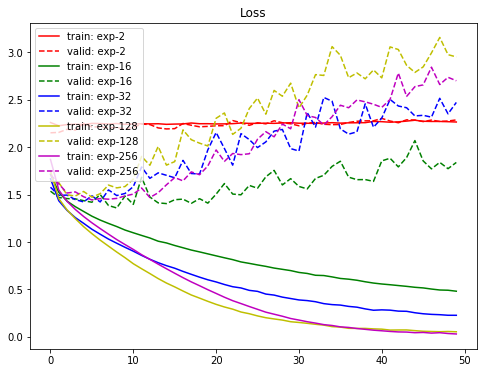

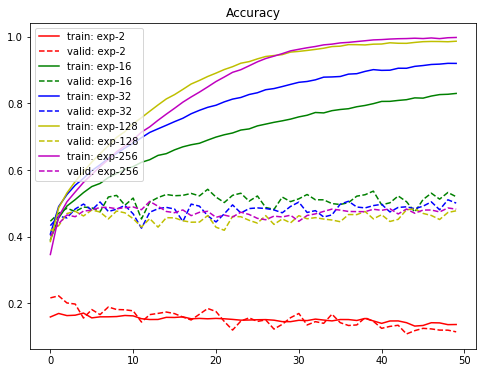

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
Plot results
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=f"train: {cond}", color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=f"valid: {cond}", color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=f"train: {cond}", color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=f"valid: {cond}", color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()